# Semillas

## ¿Cuantos clusters de grano existen?

In [57]:
# LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [58]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/seeds.csv'
samples = np.loadtxt(ruta_archivo, delimiter = ',')
samples

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

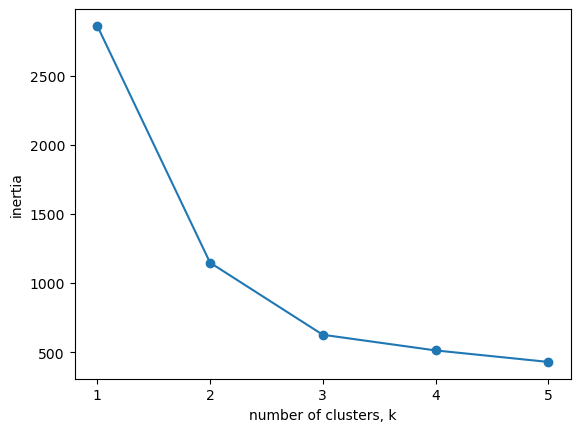

In [59]:
# Range de 1 a 5.
ks = range(1, 6)

# Crear una lista vacía para almacenar inercias.
inertias = []

# Loop de ks
for k in ks:
    # Crear una instancia de KMeans con k clusters: model
    # con n_init = 10, que se ejecuta 10 veces para diferentes
    # semillas de centroides y la mejor solución de estas 10
    # es la que se seleciona.
    model = KMeans(n_clusters = k, n_init = 10)
    
    # Ajustar modelo a muestras
    model.fit(samples)
    
    # Agregar la inercia a la lista de inertias.
    inertias.append(model.inertia_)
    
    
# Trazar ks vs inercias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

**Interpretación:** En el gráfico de inercia, 3 es un buen número de grupos para los datos de grano. De hecho, las muestras de cereales proceden de una mezcla de 3 variedades de cereales diferentes: "Kama", "Rosa" y "Canadian".

## Evaluando los clusters de grano

Ahora, agrupe las muestras de granos en tres grupos y compárelos con las variedades de granos mediante una tabulación cruzada.

Tiene la variedad `"samples"` de muestras de granos y una lista `"varieties"` que indica la variedad de granos para cada muestra.


In [60]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/varieties.csv'
varieties = pd.read_csv(ruta_archivo, header = None)
varieties = varieties[0].tolist()

In [61]:
# Crear un modelo KMeans con 3 clusters: modelo
model = KMeans(n_clusters = 3, n_init = 10, random_state = 42)

# Utilizar fit_predict para ajustar el modelo y obtener etiquetas de grupo:labels
## fit_predict es lo mismo que usar .fit() y luego .predict()
labels = model.fit_predict(samples)

# Crear un DataFrame con etiquetas y variedades como columnas: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],[df['varieties']])

# Display ct
print(ct)

varieties   Trigo rosa   trigo canadiense  Trigo Kama
labels                                               
0                   60                  0           1
1                    0                 70           5
2                   10                  0          64
